<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# read csv from Google Drive and initlize imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

df = pd.read_csv('gdrive/My Drive/fetal_health.csv')

In [3]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


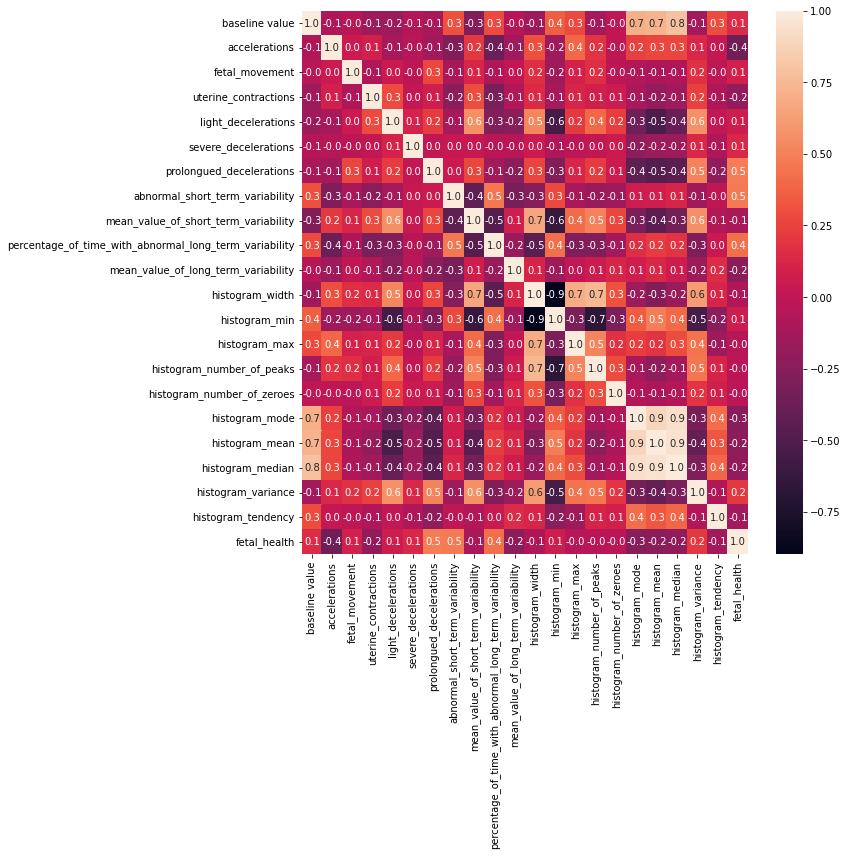

In [4]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [5]:
# shows what variables have highest correlation to fetal health
corr_matrix = df.corr()
corr_matrix["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

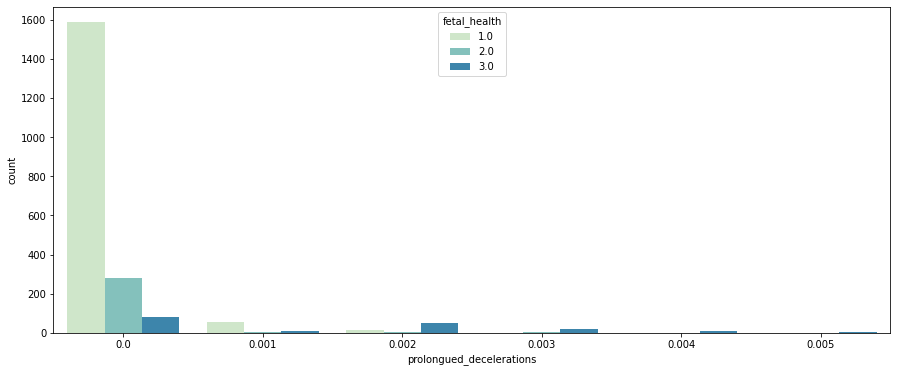

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(x='prolongued_decelerations',data = df, hue = 'fetal_health',palette='GnBu')
plt.show()

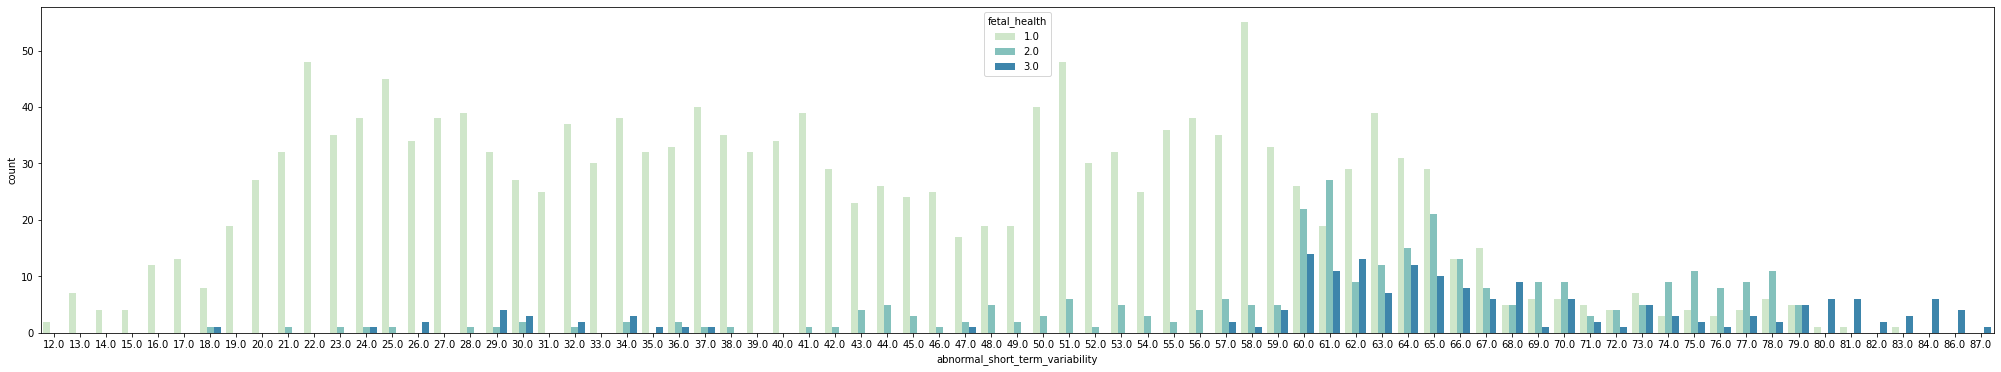

In [7]:
plt.figure(figsize=(35,6))
sns.countplot(x='abnormal_short_term_variability',data = df, hue = 'fetal_health',palette='GnBu')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f36208b50>]],
      dtype=object)

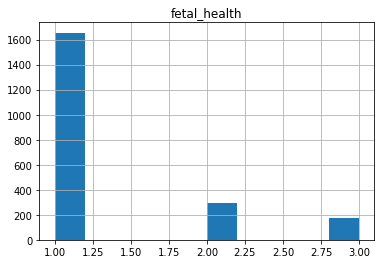

In [8]:
# plots histogram of fetal health
pd.DataFrame(df['fetal_health']).hist()

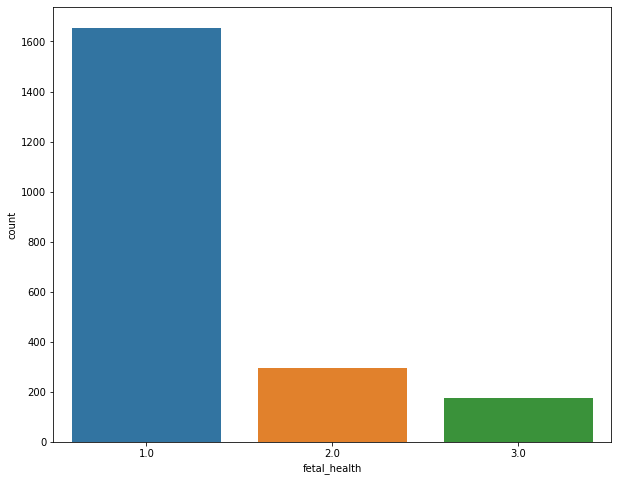

In [9]:
# plots another histogram of fetal_health
plt.figure(figsize=(10,8))
ax = sns.countplot(x = df['fetal_health'])

In [10]:
# drop na and duplicate values
df = df.dropna()
df = df.drop_duplicates(keep=False)

In [11]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# label encode DF
label = LabelEncoder()
label.fit(df['fetal_health'])
df['fetal_health'] = label.transform(df['fetal_health'])

In [13]:
# create x and y vars
x = df.drop(columns='fetal_health')
y = df['fetal_health']

# scale x value
scaler = StandardScaler()
x = scaler.fit_transform(x)

# split dataset using 80-20 rule
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten

# train a neural network with three hidden layers
# we need to keep in mind that too many layers will cause over fitting.
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[1],]),
        keras.layers.Dense(130, activation="relu"),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(3, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 21)                0         
                                                                 
 dense (Dense)               (None, 130)               2860      
                                                                 
 dense_1 (Dense)             (None, 30)                3930      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 7,133
Trainable params: 7,133
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# fits model then sets history
history = model.fit(x=X_train, y=Y_train, epochs=150, batch_size=128, validation_data=(X_test, Y_test), verbose=0)

[[1313    2    0]
 [   2  224    0]
 [   0    1  139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1315
           1       0.99      0.99      0.99       226
           2       1.00      0.99      1.00       140

    accuracy                           1.00      1681
   macro avg       1.00      0.99      0.99      1681
weighted avg       1.00      1.00      1.00      1681



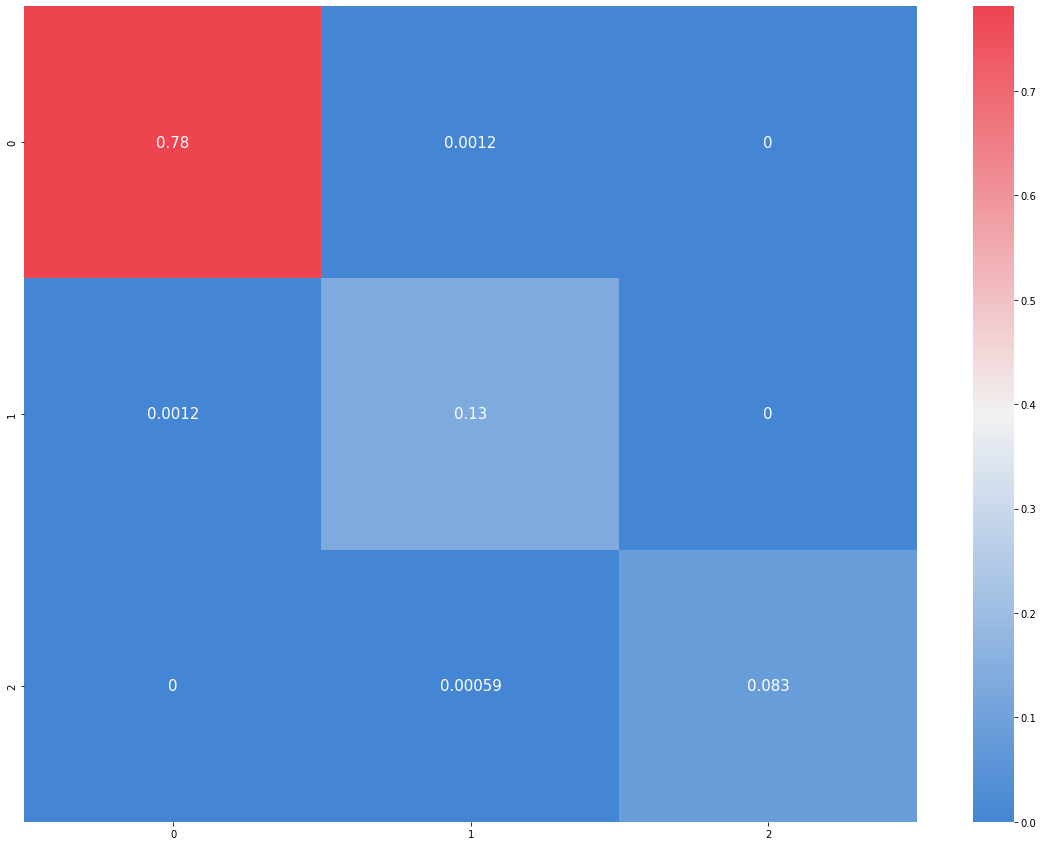

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# predicts using x_train
pred = model.predict(X_train, batch_size = 32)
pred = np.argmax(pred, axis=1)

# creates confusion matrix then prints it out
confusionMatrix = confusion_matrix(Y_train, pred)
print(confusionMatrix)

# prints out classification report
print(classification_report(Y_train, pred))

# prints out pretty confusion matrix
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(confusionMatrix/np.sum(confusionMatrix), cmap=cmap,annot = True, annot_kws = {'size':15})

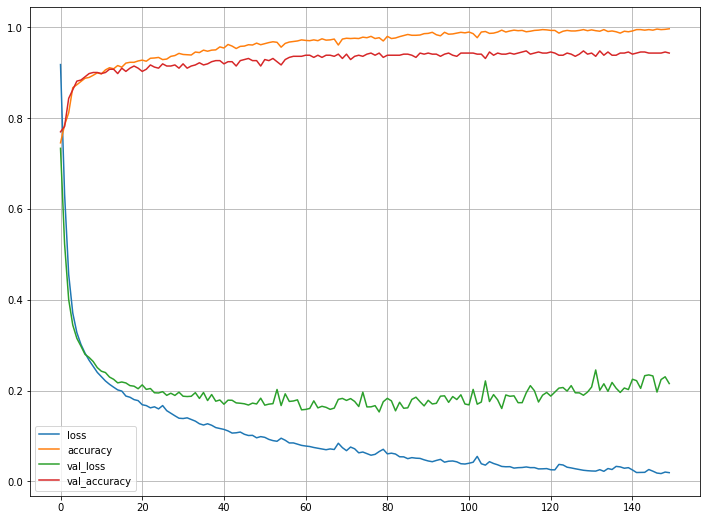

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot
from numpy import where

# next we plot the model loss and accuracy from training
pd.DataFrame(history.history).plot(figsize=(12, 9))
plt.grid(True)
plt.show()

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# creates baseline model then compile and return it
def create_baseline():
  model = keras.models.Sequential([
          keras.layers.Flatten(input_shape=[X_train.shape[1],]),
          keras.layers.Dense(130, activation="relu"),
          keras.layers.Dense(30, activation="relu"),
          keras.layers.Dense(10, activation="relu"),
          keras.layers.Dense(3, activation="softmax")
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


# creates estimator
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, verbose=0)

# cross val three fold on data set
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, x, y, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Baseline accuracy: 92.06% (+/- 0.58%)


In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# creates baseline model
def create_model( optimizer='adam'):
  model = keras.models.Sequential([
          keras.layers.Flatten(input_shape=[X_train.shape[1],]),
          keras.layers.Dense(130, activation="relu"),
          keras.layers.Dense(30, activation="relu"),
          keras.layers.Dense(10, activation="relu"),
          keras.layers.Dense(3, activation="softmax")
  ])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
  return model
    
KC = KerasClassifier(build_fn=create_model)
# possible params
parameters = {'batch_size' : [20,30,40],
          'epochs' : [10,50, 150],
          'optimizer':['adam','rmsprop']}
grid_search = GridSearchCV(estimator=KC , 
param_grid=parameters,scoring='accuracy',cv=10)
grid_result = grid_search.fit(X_train,Y_train)

# print best params from gridsearch
print(grid_result.best_score_)
print(grid_result.best_params_)

0.9256304592843054
{'batch_size': 30, 'epochs': 50, 'optimizer': 'rmsprop'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


**Summary**

The data that is given is related to Cardiotocogram exams and classified into three different sections; normal, suspect, or patholigical. We use the other given attributes to succesfully predict the target class.

When first analyzing the data we can see that the normal class has the most occurencies. We see that the attributes prolongued_decelerations and abnormal_short_term_variability have the largest correlation with the target class.

In this project we learn the powers of devloping deep learning models like using neural networks. The neural network that we use does a very good job at predicting the future values without causing that much overfiting. 

We develop a neural network with three hidden layers and using the adam approach. We use an epoch for 150 and batch size at 28. Our accuracy is 92% which is very high. We are able to then analyze the confusion matrix and see that the model correctly predicts the fetal_health. 

Next up, we used grid search to find the best possible parms to use for the neural network. The params that we used were batch sizes of 20,30,and 40, epochs of 10,50,and 150, and optimizers of either adam or rmsprop. The best params were batch size = 30, epochs = 50, and rmsprop as the optimizer. This set had a score of 92.5%.

In conclusion I was surprised at how well the neural network corectly predicted the target class. The accuracy of around 92% shows how powerful and accurate neural networks can be. Using neural networks were challenging at first but after a few practice ones I was able to fully grasp the idea and major concepts of what a neural network is doing behind the scenes. When doing grid search, it took a while to test all the possible scenarios. 
